# Efficiently searching for optimal tuning parameters
*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*

## Agenda

- How can K-fold cross-validation be used to search for an **optimal tuning parameter**?
- How can this process be made **more efficient**?
- How do you search for **multiple tuning parameters** at once?
- What do you do with those tuning parameters before making **real predictions**?
- How can the **computational expense** of this process be reduced?

## Review of K-fold cross-validation

Steps for cross-validation:

- Dataset is split into K "folds" of **equal size**
- Each fold acts as the **testing set** 1 time, and acts as the **training set** K-1 times
- **Average testing performance** is used as the estimate of out-of-sample performance

Benefits of cross-validation:

- More **reliable** estimate of out-of-sample performance than train/test split
- Can be used for selecting **tuning parameters**, choosing between **models**, and selecting **features**

Drawbacks of cross-validation:

- Can be computationally **expensive**

## Review of parameter tuning using `cross_val_score`

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [3]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y, cv=10, scoring='accuracy')
    print(scores.mean())

0.96
0.9533333333333334
0.9666666666666666
0.9666666666666666
0.9666666666666668
0.9666666666666668
0.9666666666666668
0.9666666666666668
0.9733333333333334
0.9666666666666668


In [4]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9666666666666668


In [5]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []

for k in k_range:
    #instantiate knn
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #run cross validation and keep the score
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

    #add mean score to k_scores list
    k_scores.append(scores.mean())

print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

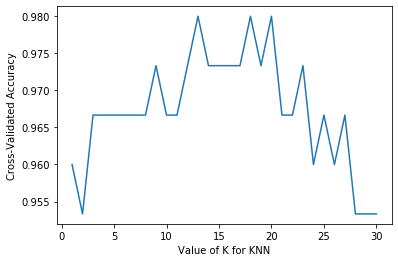

In [6]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Exercise: 

- Add the weight hyperparameter to the existing code (use uniform and distance)
- Store the k value, weight, and score
- Create a DataFrame with the results, provide it column names, order sort it to show the hyperparameters for the top 5 results

In [7]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
weights = ['uniform','distance']
k_scores = []

for weight in weights:
    for k in k_range:
        #instantiate knn
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)

        #run cross validation and keep the score
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

        #add mean score to k_scores list
        k_scores.append([k, weight, scores.mean()])

In [8]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
pd.DataFrame(k_scores, columns=['k','weight','score']).sort_values('score', ascending=False).head()

,k,weight,score
17,18,uniform,0.98
19,20,uniform,0.98
48,19,distance,0.98
46,17,distance,0.98
44,15,distance,0.98


### Exercise: 

- Add the metric hyperparameter to the existing code (use minkowski and manhattan)
- Store the k value, weight, metric, and score
- Create a DataFrame with the results, provide it column names, order sort it to show the hyperparameters for the top 5 results

In [9]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
weights = ['uniform','distance']
metrics = ['minkowski', 'manhattan']
k_scores = []

for metric in metrics:
    for weight in weights:
        for k in k_range:
            #instantiate knn
            knn = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)

            #run cross validation and keep the score
            scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

            #add mean score to k_scores list
            k_scores.append([k, weight, metric, scores.mean()])

In [10]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
pd.DataFrame(k_scores, columns=['k','weight','metric','score']).sort_values('score', ascending=False).head()

,k,weight,metric,score
46,17,distance,minkowski,0.98
48,19,distance,minkowski,0.98
19,20,uniform,minkowski,0.98
17,18,uniform,minkowski,0.98
12,13,uniform,minkowski,0.98


## More efficient parameter tuning using `GridSearchCV`

Allows you to define a **grid of parameters** that will be **searched** using K-fold cross-validation

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
# define the parameter values that should be searched
k_range = list(range(10, 20))
print(k_range)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [13]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [14]:
knn = KNeighborsClassifier()

In [15]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True)

- You can set **`n_jobs = -1`** to run computations in parallel (if supported by your computer and OS)

In [16]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                         19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [17]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([0.00098732, 0.00036187, 0.00033576, 0.00032179, 0.00033948,
        0.00032575, 0.00033741, 0.00034204, 0.0003397 , 0.00032113]),
 'std_fit_time': array([1.63648141e-03, 4.39178154e-05, 1.88450395e-05, 2.99507261e-06,
        2.96327439e-05, 1.30865741e-05, 2.66947478e-05, 5.78012594e-05,
        3.25585515e-05, 2.44875729e-06]),
 'mean_score_time': array([0.00174694, 0.00098934, 0.00097511, 0.0009371 , 0.00097611,
        0.00094028, 0.00095649, 0.00093582, 0.00098207, 0.00093746]),
 'std_score_time': array([1.39132767e-03, 9.04256768e-05, 6.69263035e-05, 3.66376132e-05,
        8.26842679e-05, 3.96772930e-05, 4.08673091e-05, 1.67105573e-05,
        9.91100298e-05, 2.09588781e-05]),
 'param_n_neighbors': masked_array(data=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 10},
  {'

In [18]:
# examine the first tuple
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 10}
0.9666666666666668


In [19]:
# create a list of the mean scores only
grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]
print(grid_mean_scores)

[0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

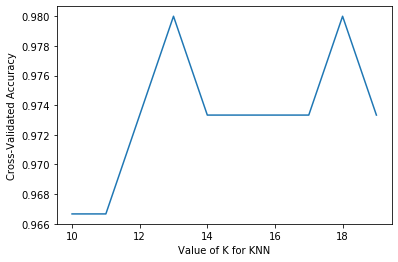

In [20]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [21]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


### Exercise

- Create a GridSearchCV using a RandomForestClassifier 
- Create a param_grid to test 20 values for n_estimators

In [22]:
from sklearn.ensemble import RandomForestClassifier

# create a random forest
rf = RandomForestClassifier()

# create a param_grid
param_grid = {'n_estimators':list(range(1,20))}

# create a grid search
grid = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', return_train_score=True)

# fit the grid search
grid.fit(X,y)

# view the best_score_, best_params_, and best_estimator_
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9666666666666666
{'n_estimators': 7}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## Searching multiple parameters simultaneously

- **Example:** tuning `max_depth` and `min_samples_leaf` for a `DecisionTreeClassifier`
- Could tune parameters **independently**: change `max_depth` while leaving `min_samples_leaf` at its default value, and vice versa
- But, best performance might be achieved when **neither parameter** is at its default value

In [23]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [24]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [25]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [30]:
# view the complete results
grid.cv_results_

{'mean_fit_time': array([0.00114229, 0.00050218, 0.00046759, 0.00037408, 0.00037789,
        0.0003392 , 0.00042245, 0.00033872, 0.00041907, 0.00036807,
        0.00039797, 0.0003628 , 0.00036604, 0.00039635, 0.00033975,
        0.0003283 , 0.000319  , 0.00033193, 0.00032098, 0.00031767,
        0.00039239, 0.00033412, 0.0003231 , 0.00033123, 0.00032005,
        0.00031769, 0.00031745, 0.00037112, 0.00033679, 0.00031862,
        0.00032136, 0.00034258, 0.00031884, 0.00031621, 0.00034084,
        0.00038164, 0.00033681, 0.00032463, 0.00032284, 0.00032802,
        0.00031822, 0.00031748, 0.00043602, 0.00032918, 0.00032198,
        0.00031707, 0.00032229, 0.00031769, 0.00032039, 0.000353  ,
        0.00032866, 0.00033066, 0.00032253, 0.00031881, 0.00031734,
        0.00031905, 0.00032191, 0.00044308, 0.00033729, 0.00032127]),
 'std_fit_time': array([6.62571146e-04, 1.02514447e-04, 8.51634902e-05, 2.63432571e-05,
        6.21998387e-05, 2.15589069e-05, 1.36188167e-04, 1.79894836e-05,
     

In [31]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.9800000000000001
{'n_neighbors': 13, 'weights': 'uniform'}


## Using the best parameters to make predictions

In [32]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X, y)

# make a prediction on out-of-sample data
knn.predict([[3, 5, 4, 2]])

array([1])

In [33]:
# shortcut: GridSearchCV automatically refits the best model using all of the data
grid.predict([[3, 5, 4, 2]])

array([1])

## Reducing computational expense using `RandomizedSearchCV`

- Searching many different parameters at once may be computationally infeasible
- `RandomizedSearchCV` searches a subset of the parameters, and you control the computational "budget"

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

- **Important:** Specify a continuous distribution (rather than a list of values) for any continous parameters

In [36]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy',
                          n_iter=10, random_state=5, return_train_score=True)
rand.fit(X, y)
rand.cv_results_

{'mean_fit_time': array([0.00066519, 0.00036607, 0.00033138, 0.00033996, 0.00033376,
        0.00032101, 0.0003293 , 0.0003372 , 0.00032485, 0.000388  ]),
 'std_fit_time': array([2.36982695e-04, 3.82985442e-05, 1.17733644e-05, 2.70065113e-05,
        1.80526952e-05, 1.37871097e-06, 1.68039607e-05, 3.84049410e-05,
        5.85097847e-06, 8.25722538e-05]),
 'mean_score_time': array([0.00135248, 0.00102441, 0.00094845, 0.00101509, 0.00096335,
        0.00064118, 0.0006835 , 0.00096288, 0.00064437, 0.00110128]),
 'std_score_time': array([5.36199908e-04, 7.32852369e-05, 1.83270704e-05, 8.97878291e-05,
        9.11694690e-06, 9.52603812e-06, 4.73746536e-05, 9.37876508e-05,
        1.02575697e-05, 2.06225000e-04]),
 'param_weights': masked_array(data=['distance', 'uniform', 'uniform', 'uniform', 'uniform',
                    'distance', 'distance', 'uniform', 'distance',
                    'uniform'],
              mask=[False, False, False, False, False, False, False, False,
              

In [44]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.9666666666666666
{'n_estimators': 13, 'min_samples_leaf': 1}


In [53]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy')
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

ValueError: Invalid parameter n_estimators for estimator KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform'). Check the list of available parameters with `estimator.get_params().keys()`.

### Exercise

- Create a RandomizedSearchCV using a RandomForestClassifier 
- Create a param_grid to test 20 values for n_estimators and 5 values for min_samples_leaf

In [52]:
# specify "parameter distributions" rather than a "parameter grid"
rf = RandomForestClassifier()
param_dist = dict(n_estimators=range(1,20), min_samples_leaf=range(1,5))

# n_iter controls the number of searches
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy',
                          n_iter=10, random_state=5, return_train_score=True)
rand.fit(X, y)
rand.cv_results_

{'mean_fit_time': array([0.01060503, 0.00879669, 0.01197941, 0.01699579, 0.00758846,
        0.01815212, 0.00140018, 0.02040083, 0.0024368 , 0.01392138]),
 'std_fit_time': array([4.39792849e-03, 1.08267712e-04, 4.08331852e-04, 1.85518037e-04,
        4.87252043e-05, 3.92676315e-04, 4.54352004e-05, 5.39168032e-04,
        4.81204123e-05, 2.24097085e-04]),
 'mean_score_time': array([0.00110219, 0.00095952, 0.00116982, 0.00151641, 0.000876  ,
        0.00155182, 0.0004456 , 0.00167918, 0.00050099, 0.00125947]),
 'std_score_time': array([3.76061736e-04, 5.55964573e-05, 8.96027139e-05, 1.13124581e-04,
        6.27646860e-05, 6.96004067e-05, 6.22234124e-05, 3.99259656e-05,
        5.05880180e-06, 1.00725572e-05]),
 'param_n_estimators': masked_array(data=[7, 8, 11, 16, 7, 17, 1, 19, 2, 13],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(d

### Pipeline

In [54]:
# fix the cross-validation process using Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.9533333333333334

In [55]:
# create a pipeline
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

# search for an optimal n_neighbors value using GridSearchCV
neighbors_range = list(range(1, 21))
mean_options = [True,False]

#create a param grid
param_grid = dict(standardscaler__with_mean=mean_options, kneighborsclassifier__n_neighbors=neighbors_range)

# create a grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

# fit the grid
grid.fit(X, y)

# view the best_score_ and best_params_
print(grid.best_score_)
print(grid.best_params_)

0.9666666666666668
{'kneighborsclassifier__n_neighbors': 6, 'standardscaler__with_mean': True}


### Exercise

- creat pipeline with a standardscaler and a randomforestclassifier
- add hyperparameters to both steps in the pipeline

In [56]:
# create a pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

# search for an optimal n_neighbors value using GridSearchCV
estimator_range = list(range(1, 21))
mean_options = [True,False]

#create a param grid
param_grid = dict(standardscaler__with_mean=mean_options, randomforestclassifier__n_estimators=estimator_range)

# create a grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

# fit the grid
grid.fit(X, y)

# view the best_score_ and best_params_
print(grid.best_score_)
print(grid.best_params_)

0.9666666666666668
{'randomforestclassifier__n_estimators': 3, 'standardscaler__with_mean': False}


## Resources

- scikit-learn documentation: [Grid search](http://scikit-learn.org/stable/modules/grid_search.html), [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html), [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.RandomizedSearchCV.html)
- Timed example: [Comparing randomized search and grid search](http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html)
- scikit-learn workshop by Andreas Mueller: [Video segment on randomized search](https://youtu.be/0wUF_Ov8b0A?t=17m38s) (3 minutes), [related notebook](https://github.com/amueller/pydata-nyc-advanced-sklearn/blob/master/Chapter%203%20-%20Randomized%20Hyper%20Parameter%20Search.ipynb)
- Paper by Yoshua Bengio: [Random Search for Hyper-Parameter Optimization](http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)

## Comments or Questions?

- Email: <kevin@dataschool.io>
- Website: http://dataschool.io
- Twitter: [@justmarkham](https://twitter.com/justmarkham)